## **09. Representasi Pengetahuan (Knowledge Representation)**

---


In [71]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [72]:
data_testing = pd.read_csv('hasil_prediksi(cnn).csv')

In [73]:
#eda dari data_testing jumlah kosa kata dan kata terpanjang pada full_text
print(data_testing['full_text'].str.split().apply(len).describe())



count    1880.000000
mean       18.262766
std        11.283473
min         2.000000
25%        10.000000
50%        15.000000
75%        25.000000
max        54.000000
Name: full_text, dtype: float64


In [74]:
#tampilkan atribut yang ada di data
data_testing.columns

Index(['username', 'full_text', 'topic', 'predicted_label',
       'probability_emotion'],
      dtype='object')

In [75]:
#ubah nama atribut topic_cluster menjadi topic
data_testing.rename(columns={'topic_cluster':'topic'}, inplace=True)

#tambahkan atribut probability = 0
data_testing['probability'] = 0

#tambahkan atribut konteks dengan 0
data_testing['context'] = 0


In [76]:
#tampilkan hanya kolom full_text, topic_cluster, emotion dan username
merged_df = data_testing[['username','full_text','topic', 'predicted_label', 'probability_emotion']]

merged_df.head(10)

,username,full_text,topic,predicted_label,probability_emotion
0,tigapuluhtigax,TIMNAS PRIA DAN WANITA MENANG + ERIK TEN HAG STAY,1,Love,0.356783
1,sotongism,ngerasa ga sih sekarang timnas kalo main pakek jersey putih tuh aura menangnya naik drastis beda sama dulu kalo main pakek jersey putih nih pesimis duluan #TimnasDay,3,Anger,0.398854
2,peanutkacang123,2 Sejarah Dicetak Timnas Indonesia Usai Ganyang Filipina STY Pelatih Pemecah Rekor. #TimNasDay https://t.co/nLxTrlEYx5.,3,Joy,0.429124
3,PKananku1927,@womensfootie_id Tinggal tmbah pemain diaspora bisa lah ini timnas putri bersaing di Asia,1,Anger,0.244084
4,kangsil2012,Timnas Indonesia Vs Timnas Filipina 2-0 Indonesia Lolos ke Putaran Ketiga Kuaifikasi Piala Dunia 2026 https://t.co/if6QFIOQdd #sepakbola #IndonesiaFilipina #kualifikasipialadunia #TimnasIndonesia #TimnasFilipina #pssi,2,Joy,0.595000
5,refnotrev,@amayzing__ @idextratime antara lu fomo timnas atau emang kaga ngerti sistem pot,8,Anger,0.241570
6,KimJongUncchhhh,@fahmiiiiii14 @idextratime Beliau ini literally mantan pemain timnas yg beneran orang bola. Lah yg duduk di vip malah artis2 ga jelas. Kesannya kek habis manis sepah dibuang njir,3,Sad,0.335323
7,joyszeamays,Ternyata jodohnya sama Indo-Philiphine bukan Indo-Irak. Bonus liat perjuangan timnas lolos ke putaran ketiga : ),2,Love,0.305790
8,DenSombedt,@StatsRawon Kyok e Malik Rivera ambek glison Costa soale Malik wes mari teko timnas Kari Poto ambk gwe vidio,3,Joy,0.377967
9,ilyasaihza_,Sareneng kitu timnas menang? Abi mah bodo amat,4,Sad,0.292859


In [77]:
jumlah_nan = merged_df.isna().sum()

print(jumlah_nan)

username               0
full_text              0
topic                  0
predicted_label        0
probability_emotion    0
dtype: int64


In [78]:
#count emotion
emotion_count = merged_df['predicted_label'].value_counts()
emotion_count

predicted_label
Joy        834
Anger      353
Love       318
Neutral    228
Sad        128
Fear        19
Name: count, dtype: int64

## Knowledge

### Per-Topic

In [79]:
topic_cluster_counts = merged_df['topic'].value_counts().reset_index()
topic_cluster_counts

,topic,count
0,3,351
1,0,335
2,1,292
3,2,264
4,4,243
5,5,157
6,7,84
7,8,76
8,9,54
9,6,24


In [85]:
#berikan saya emosi paling banyak dari setiap topik
topik_dan_emosi = merged_df.groupby('topic')['predicted_label'].value_counts().groupby('topic').head(1)
topik_dan_emosi

topic  predicted_label
0      Joy                142
1      Joy                138
2      Joy                138
3      Joy                165
4      Joy                101
5      Joy                 67
6      Joy                 11
7      Joy                 32
8      Joy                 27
9      Anger               21
Name: count, dtype: int64

In [80]:
topik_ke = 3

topic_cluster_0_df = merged_df[merged_df['topic'] == topik_ke]
topic_cluster_0_df = topic_cluster_0_df.sort_values(by='predicted_label', ascending=True)

count_emotion = topic_cluster_0_df['predicted_label'].value_counts().reset_index()
count_emotion

,predicted_label,count
0,Joy,165
1,Anger,76
2,Love,41
3,Neutral,35
4,Sad,27
5,Fear,7


In [81]:
#jumlah data yang ada di topic_cluster_0_df
print('jumlah data yang ada di topic_cluster_0_df = ', len(topic_cluster_0_df))

jumlah data yang ada di topic_cluster_0_df =  351


<Axes: xlabel='predicted_label', ylabel='count'>

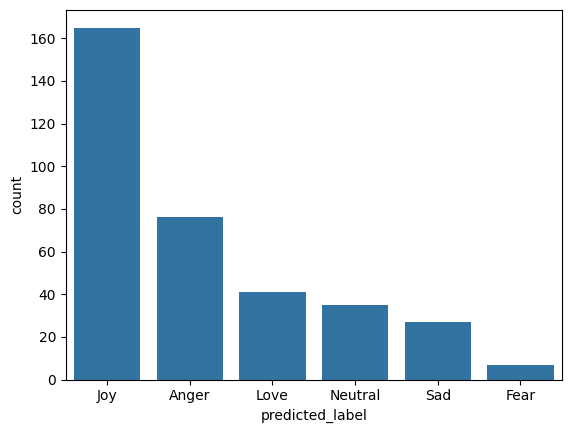

In [82]:
sns.barplot(x='predicted_label', y='count', data=count_emotion)


In [83]:
topic_cluster_0_df = topic_cluster_0_df.sort_values(by='predicted_label', ascending=False)


#tampilkan semuanya di output jangan dibatasi
pd.set_option('display.max_rows', None)
topic_cluster_0_df.head(10)


,username,full_text,topic,predicted_label,probability_emotion
211,dheshooo,Knp vibe menangnya persib lebih lebih dr timnas??!! Masih gk ngrti,3,Sad,0.230230
387,RestuRagil15578,@UpdateBolabola Bgst lah. Mana vision + berbayarnya jg geje. Udah beli paket sport eh timnas main harus beli lagi,3,Sad,0.260844
87,feri_ferdinan_,@txtdrremotetv @iridocyclitys Kemarin anaknya jadi pendamping timnas. Ini sudah pasti idenya si Anang.,3,Sad,0.345049
960,IhsanBepe,@novianpriyo @TimnasIndonesia Kowe mending gantike Anang nyanyi wae yo,3,Sad,0.237559
101,yourspecious,gara timnas baru kali ini ngeliat ada cowok yang ceweknya ngomong i love you ke cowok lain ga marah cemburu dll,3,Sad,0.382757
6,KimJongUncchhhh,@fahmiiiiii14 @idextratime Beliau ini literally mantan pemain timnas yg beneran orang bola. Lah yg duduk di vip malah artis2 ga jelas. Kesannya kek habis manis sepah dibuang njir,3,Sad,0.335323
329,0852_3195,Sejarah yang bisa dibanggakan itu kalo pemain timnas seluruhnya pemain lokal bukan mayoritas naturalisasi. Dari semua bidang yang ada di Indonesia hampir semuanya dikuasai orang asing salah satunya sepakbola https://t.co/Xu6GVOtfgo,3,Sad,0.324021
25,khoirul7779,@kegblgnunfaedh Gua mah semalam kesal saat pemain timnas Indonesia melingkar malah ada anang asanti nyanyi gak karuan bikin kesel,3,Sad,0.475744
119,HEFFERONZA,@wanstio @Indostransfer Makanya bagusnya kita jgn bicara banyak dulu sebelum ngalahkan satu atau dua tim di putaran 3. Kalau U23 kemarin dah teruji australia dan Korea bisa dihajar.timnas senior ini belum tahu.,3,Sad,0.337207
474,Teguran3,@idextratime @bliblidotcom Dulu pencapaian terbaik nonton timnas pas final AFF lawan Malaysia dan optimis menang karena di fase group menang 5-1 tapi kalah di final nyesek banget,3,Sad,0.304260


In [84]:
#ukuran kolom jangan dibatasi untuk full_text
pd.set_option('display.max_colwidth', None)

#tampilkan hanya emosi Joy
topic_cluster_0_df[topic_cluster_0_df['predicted_label'] == 'Fear'].head(200)

,username,full_text,topic,predicted_label,probability_emotion
98,boyoftheyearrr,@Letterrnjnn rcti lupa kalo atmosfer sepakbola kita lagi naik otomatis dgn menyiarkan momen after match bisa menarik minat para masyarakat dan yg pasti menambah kesan dan nama baik dari pihak broadcaster btw ini ga cuma hanya waktu timnas tp waktu liga 1 kmrin jg gitu. salut emtek group,3,Fear,0.388511
1458,znnbraveheart,Minum anang karaoke #TimNasDay,3,Fear,0.382122
229,UnekUnek22,Takut berharap lebih nanti kecewa lagi Ehh gak jadi TIMNAS MENANG #TimNasDay #IndonesiaEmas2045,3,Fear,0.292094
429,iam_ruby11,Gw nihh bingung. Knapaaa tbtb kok nyanyi????? Dan lagunya apalagi itu gak jelas. The real merusak moment haru biru kemenangan timnasharusnya pas ini intimate moment timnas sama supporter malah ambyaaarrrrr,3,Fear,0.399155
1552,Rohan_BW,Sakitnya sampe sini . . ___________ Syifa ernando ronde 3 verdonk towel arhan ngerusak Adrian anang #TimNasDay https://t.co/bDt1jgpBxd,3,Fear,0.648503
1554,LiliAngelica6,Sebenernya apa sih yg sedang Israel cari? . . ______________ Syifa ernando ronde 3 verdonk towel arhan ngerusak Adrian anang #TimNasDay https://t.co/W2GIr8DoRb,3,Fear,0.346711
434,503_3rror,@Lialadyrose89 @majid_muh23 @amayzing__ @idextratime image iran masih negara konflik banyak perang tapi timnas sepakbolanya jago njir,3,Fear,0.277413


# Konten Tentang Timnas Indonesia di Vidio

## 1. Dukungan Penggemar untuk Timnas Indonesia (Joy)
**Konten Senang**: Video yang menyoroti dukungan penuh dari para penggemar untuk Timnas Indonesia, termasuk ucapan selamat dan sorak-sorai setelah kemenangan dalam berbagai pertandingan.

**Contoh Tweet**:
> Dukungan luar biasa dari penggemar untuk Timnas Indonesia! 🎉 Saksikan momen-momen kegembiraan dan ucapan selamat untuk para pemain. #DukungTimnas [link video]

## 2. Perjalanan Timnas Indonesia di Babak Kualifikasi Piala Dunia dan Piala Asia (Joy)
**Konten Senang**: Video rekapitulasi perjalanan Timnas Indonesia di babak kualifikasi, termasuk momen-momen penting dan wawancara dengan pemain serta pelatih.

**Contoh Tweet**:
> Timnas Indonesia tampil impresif di kualifikasi Piala Dunia dan Piala Asia! 🎉 Saksikan rekap perjalanan mereka dan wawancara eksklusif. #TimnasKualifikasi [link video]

## 3. Keberhasilan Timnas Indonesia Lolos ke Putaran Ketiga Kualifikasi Piala Dunia 2026 (Joy)
**Konten Senang**: Cuplikan video dari momen-momen gol dan selebrasi pemain serta fans. Kutipan inspiratif dari pelatih dan pemain tentang perjalanan mereka menuju kualifikasi.

**Contoh Tweet**:
> Timnas Indonesia lolos ke putaran ketiga kualifikasi Piala Dunia 2026! 🎊 Saksikan momen-momen terbaik dan kegembiraan para pemain dan fans! #TimnasLolos [link video]

## 4. Penampilan Anang Menyanyikan "Indonesia Pusaka" Sebelum Pertandingan (Anger)
**Konten Marah**: Video atau artikel yang membahas reaksi emosional penggemar terhadap penampilan Anang menyanyikan "Indonesia Pusaka" sebelum pertandingan, dengan fokus pada kontroversi dan pendapat yang beragam.

**Contoh Tweet**:
> Penampilan Anang menyanyikan "Indonesia Pusaka" sebelum pertandingan menimbulkan berbagai reaksi. Apa pendapat kalian? #IndonesiaPusaka [link video]

## 5. Performa Thom Haye dan Verdonk di lapangan saat bersama timnas(Love)
**Konten Cinta**: Video reaksi penggemar yang menunjukkan dukungan dan kasih sayang mereka kepada pemain seperti Verdonk dan Haye. Testimoni dari fans tentang kecintaan mereka pada pemain dan tim.

**Contoh Tweet**:
> Dukungan luar biasa dari penggemar untuk Verdonk dan Haye! ❤️ Saksikan reaksi dan testimoni mereka tentang kecintaan pada Timnas Indonesia. #LoveForTimnas [link video]

## 6. Momen Bersejarah dan Gol Penting Timnas Indonesia (Joy)
**Konten Senang**: Cuplikan video dari momen-momen bersejarah dan gol-gol penting yang dicetak oleh Timnas Indonesia dalam babak kualifikasi dan turnamen AFF.

**Contoh Tweet**:
> Gol-gol bersejarah dari Timnas Indonesia di babak kualifikasi dan turnamen AFF! 🎊 Saksikan momen-momen terbaik di sini. #TimnasGol [link video]

## 7. Kondisi Rumput di Stadion Gelora Bung Karno Setelah Konser (Fear)
**Konten Takut**: Video yang menunjukkan kondisi rumput di Stadion Gelora Bung Karno setelah konser, dengan sorotan pada keluhan penggemar mengenai dampaknya pada performa timnas Indonesia di lapangan.

**Contoh Tweet**:
> Lihat kondisi rumput Stadion Gelora Bung Karno setelah konser dan bagaimana ini memengaruhi performa timnas Indonesia. #GBKRumput [link video]

## 8. Diskusi Strategi Pelatih Shin Tae-yong dan Potensi Pemain Diaspora (Joy)
**Konten Senang**: Video yang menyoroti strategi pelatih Shin Tae-yong dan performa pemain seperti Ernando dan Verdonk, termasuk diskusi tentang potensi pemain diaspora untuk memperkuat timnas.

**Contoh Tweet**:
> Lihat bagaimana strategi Shin Tae-yong membawa Timnas Indonesia ke puncak! 🎉 Diskusi tentang pemain diaspora dan potensi mereka di sini. 💪🇮🇩 [link video]

## 9. Kondisi Lapangan dan Performa Pemain di Berbagai Pertandingan (Fear)
**Konten Takut**: Video yang menunjukkan kondisi lapangan yang kurang baik dan dampaknya pada performa pemain Timnas Indonesia di berbagai pertandingan.

**Contoh Tweet**:
> Kondisi lapangan yang kurang baik memengaruhi performa pemain Timnas Indonesia. Lihat bagaimana ini berdampak pada pertandingan. #KondisiLapangan [link video]

## 10. Pengalaman Penggemar Menonton Pertandingan Timnas Indonesia (Fear)
**Konten Takut**: Video yang menunjukkan pengalaman penggemar saat menonton pertandingan timnas, dengan fokus pada momen-momen penting dan rasa takut akan ketinggalan (FOMO).

**Contoh Tweet**:
> Banyak yang merasa FOMO karena tidak bisa menonton langsung Timnas. 😢 Simak cerita mereka dan dukung Timnas dari rumah! #FOMOTimnas [link video]